In [7]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [10]:
img = image.load_img('c:/Users/LENOVO/OneDrive/Desktop/happy or sad/training/happy/WhatsApp Image 2025-06-11 at 10.52.38 PM (1).jpeg')


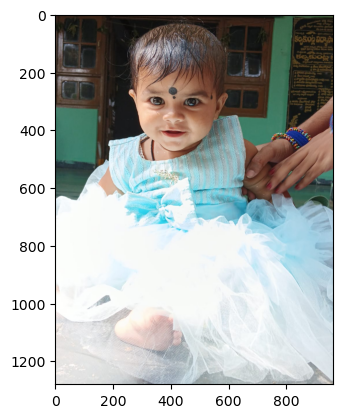

In [11]:
plt.imshow(img)

In [ ]:
i1 = cv2.imread(r'c:/Users/LENOVO/OneDrive/Desktop/happy or sad/training/happy/WhatsApp Image 2025-06-11 at 10.52.38 PM (1).jpeg')
i1
# 3 dimension metrics are created for the image
# the value ranges from 0-255

array([[[ 31,  40,  54],
        [ 31,  40,  54],
        [ 30,  37,  56],
        ...,
        [ 68,  97,  58],
        [ 68,  98,  57],
        [ 68,  98,  57]],

       [[ 31,  40,  54],
        [ 30,  39,  53],
        [ 30,  37,  56],
        ...,
        [ 69,  98,  59],
        [ 69,  98,  59],
        [ 69,  98,  59]],

       [[ 30,  39,  53],
        [ 30,  39,  53],
        [ 29,  36,  55],
        ...,
        [ 72, 100,  64],
        [ 72, 100,  64],
        [ 72, 100,  64]],

       ...,

       [[226, 228, 229],
        [228, 230, 231],
        [228, 230, 231],
        ...,
        [152, 157, 156],
        [152, 157, 156],
        [152, 157, 156]],

       [[227, 229, 230],
        [228, 230, 231],
        [229, 231, 232],
        ...,
        [154, 159, 158],
        [154, 159, 158],
        [154, 159, 158]],

       [[227, 229, 230],
        [228, 230, 231],
        [229, 231, 232],
        ...,
        [157, 161, 162],
        [157, 162, 161],
        [157, 162, 161]]

In [ ]:
i1.shape
# shape of your image height, weight, rgb

(1280, 963, 3)

In [15]:
train = ImageDataGenerator(rescale=1/200)
validation = ImageDataGenerator(rescale=1/200)
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [19]:
train_dataset = train.flow_from_directory(r'c:\Users\LENOVO\OneDrive\Desktop\happy or sad\training',
                                        target_size=(200,200),
                                        batch_size=32,
                                        class_mode = 'binary')
validation_dataset = validation.flow_from_directory(r'c:\Users\LENOVO\OneDrive\Desktop\happy or sad\valiadtion',
                                                    target_size = (200,200),
                                                    batch_size = 32,
                                                    class_mode='binary')

Found 33 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [20]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [21]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
# now we are apply maxpooling
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),   #3 filters we applyed
                                   
                                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512, activation='relu'),
                                   #
                                   tf.keras.layers.Dense(1, activation='sigmoid')
                                   ]
                                  )

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)


In [34]:
model_fit = model.fit(train_dataset,epochs=15)

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5960 - loss: 1.0329  
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.5101 - loss: 0.6413
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4646 - loss: 1.0705      
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6768 - loss: 0.5960  
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7576 - loss: 0.4793  
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.6632 - loss: 0.4975
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.6326 - loss: 0.9053
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4040 - loss: 0.7247      
Epoch 9/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7576 - loss: 0.4193  
Epoch 10/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5455 - loss: 0.6364      
Epoch 11/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.9694 - loss: 0.3935
Epoch 12/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.5407

In [37]:
dir_path = (r'c:\Users\LENOVO\OneDrive\Desktop\happy or sad\testing')
for i in os.listdir(dir_path):
    print(i)

WhatsApp Image 2025-06-11 at 10.23.17 PM (1).jpeg
WhatsApp Image 2025-06-11 at 10.23.20 PM.jpeg
WhatsApp Image 2025-06-11 at 10.23.21 PM (2).jpeg
WhatsApp Image 2025-06-11 at 10.23.22 PM (1).jpeg
WhatsApp Image 2025-06-11 at 10.23.24 PM.jpeg
WhatsApp Image 2025-06-11 at 10.23.29 PM.jpeg
WhatsApp Image 2025-06-11 at 10.23.30 PM.jpeg


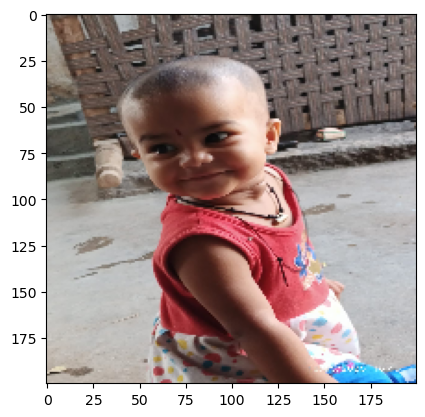

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
i am happy


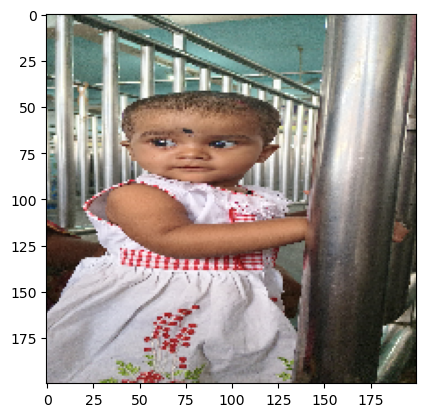

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
i am happy


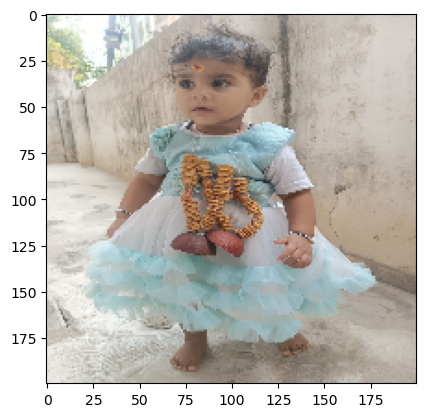

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
i am happy


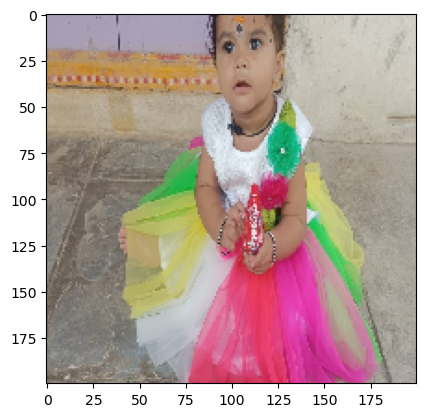

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
i am happy


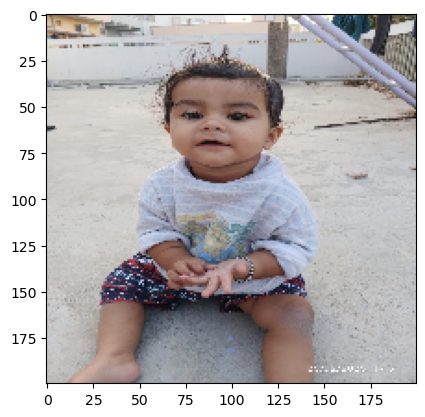

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
i am happy


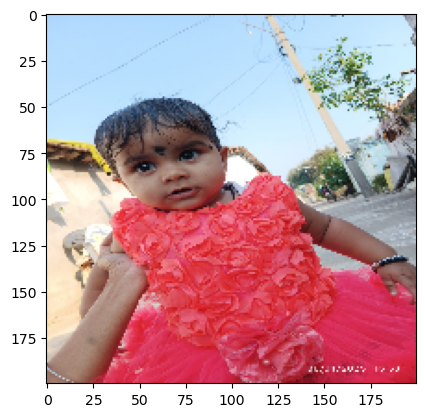

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
i am happy


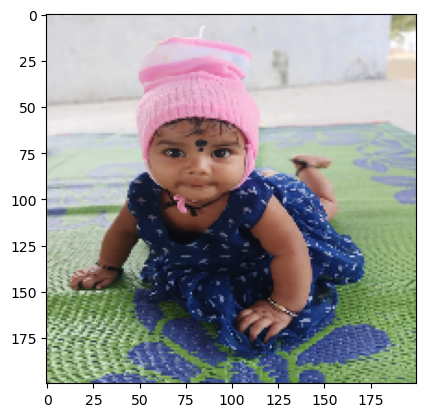

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
i am happy


In [39]:
dir_path = (r'c:\Users\LENOVO\OneDrive\Desktop\happy or sad\testing')
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0:
        print( ' i am not happy')
    else:
        print('i am happy')
